In [2]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import 'seaborn'
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

# import 'factorial' from math library
from math import factorial

# import 'stats' package from scipy library
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm

# import 'random' to generate a random sample
import random

# import statistics to perform statistical computation  
import statistics

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
import scipy.stats as st

# import the function to calculate the power of test
from statsmodels.stats import power

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1-Sample Test

In [4]:
## Step 0: Normality Test - Shapiro Test
## Note: If the sample test is < 30 , not required to test else we test.
## Normality Test: 
## H0 : Population Data = Normal
## H1 : Population Data != Normal

st.shapiro(df.total_bill)

ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)

Since the P value is cloase to 0 < alpha(0.05) --------> reject H0

Hence the Population Data is not in Normal

Since the normality test failed, we need to proceed for parametric test - i.e Wilcoxon Test

H0 : Polulation Median = 20
H1 : Polulation Median != 20

In [6]:
print("Median of the Total Bill Sample : ", df.total_bill.median())
median = 20
med_data = df.total_bill - median
st.wilcoxon(med_data)

Median of the Total Bill Sample :  17.795


WilcoxonResult(statistic=12643.5, pvalue=0.03703500887146945)

Since P value (0.03) > alpha(0.05) ---> Fail to reject H0;

Hence we conclude that the Sample does not belongs to the population of whose median is $20

In [ ]:
## Step 1: state H0 & H1 & level of significance ( alpha )

Test the Claim that averahe total bill is more for dinner rather than lunch ?

In [7]:
df.groupby('time')['total_bill'].describe()

C:\Users\lokesh\AppData\Local\Temp\ipykernel_30040\1293134793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].describe()


,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,17.168676,7.713882,7.51,12.2350,15.965,19.5325,43.11
Dinner,176.0,20.797159,9.142029,3.07,14.4375,18.390,25.2825,50.81


C:\Users\lokesh\AppData\Local\Temp\ipykernel_30040\4099440273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].plot(kind='kde')


time
Lunch     Axes(0.125,0.11;0.775x0.77)
Dinner    Axes(0.125,0.11;0.775x0.77)
Name: total_bill, dtype: object

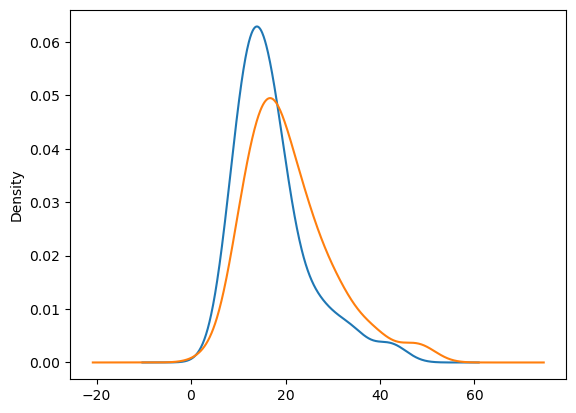

In [8]:
df.groupby('time')['total_bill'].plot(kind='kde', legend=)

c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='time', ylabel='total_bill'>

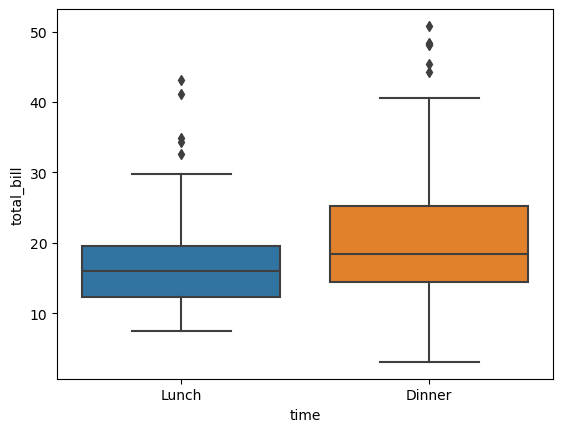

In [9]:
sns.boxplot(data=df, y='total_bill', x='time')

In [10]:
tb_lunch = df[df.time == "Lunch"].total_bill
tb_dinner = df[df.time == "Dinner"].total_bill

#### Assumption 1: test of normality ( bypassing this step as sample size is > 30)
#### Assumption 2: Variance equality test 

> H0: pop1 var = pop2 var

> H1: pop1 var != pop2 var

In [11]:
st.levene(tb_lunch, tb_dinner)

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

Since p value (0.1) is > alpha (0.05) ---> fail to reject H0;

Hence we can say that the population variances are Equal

In [13]:
## Step 1: H0: mu_tb_dinner <= mu_tb_lunch
#          H1: mu_tb_dinner > mu_tb_lunch
alpha = 0.05 
# We have choosen independent 2 samples test of mean, so we can go with T-tets
# irrespective of sample size go for T-test, when not aware of population standard deviation
# Hence use 2 sample independent test.
st.ttest_ind(tb_dinner, tb_lunch, equal_var=True, alternative='greater') 
# since population variances are equal we have given equal_var as True and alternative as greater because the claim is about verifying greater value on dinner.

Ttest_indResult(statistic=2.8976375218366424, pvalue=0.002052310703797837)